In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
import itertools
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import BaggingClassifier 
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [3]:
Label = pd.read_csv('0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')
Label
Training = pd.read_csv("4910797b-ee55-40a7-8668-10efd5c1b960.csv")
df = pd.merge(Training, Label, on='id')
Test = pd.read_csv('702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv')
df.dropna(inplace=True)
lb_make = LabelEncoder()
df["status_group_code"] = lb_make.fit_transform(df["status_group"])

In [4]:
df = df.drop(columns= ['id','num_private','funder','extraction_type_group','extraction_type_class','date_recorded','wpt_name','subvillage','lga','ward','recorded_by','scheme_management','management_group','payment_type','source_type','source_class','waterpoint_type_group','management'],axis=1)


In [5]:
C = df[['public_meeting','permit']].astype('bool')
df[['public_meeting','permit']] = C

In [6]:
df['years_operational'] = df['construction_year'].apply(lambda x: 2020 - x)


In [7]:
df['years_operational'].replace(to_replace=2020,value=100,inplace=True)


In [8]:
df.drop('construction_year',axis = 1)
dummies = pd.get_dummies(df,columns=['basin','region','scheme_name','quality_group','quantity_group','installer','payment','water_quality','quantity','source', 'waterpoint_type','extraction_type'])


In [35]:
dummies.groupby(['status_group','amount_tsh'])['amount_tsh'].count()

status_group             amount_tsh
functional               0.0           7374
                         2.0             13
                         5.0            328
                         6.0            172
                         7.0             54
                         10.0           552
                         15.0            12
                         20.0           700
                         25.0           175
                         30.0           366
                         33.0            20
                         35.0             6
                         40.0            39
                         50.0           980
                         53.0             1
                         60.0             6
                         70.0             6
                         100.0          249
                         150.0            3
                         200.0          523
                         220.0            1
                         250.0          

NameError: name 'planets' is not defined

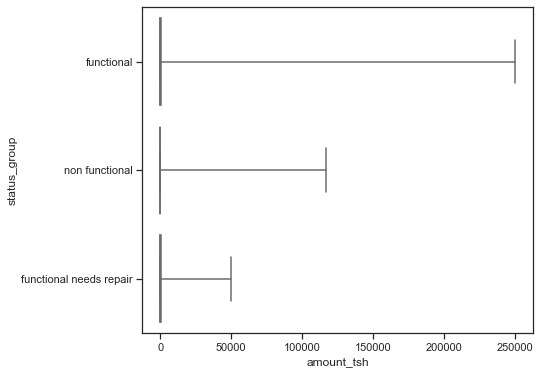

In [38]:
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("linear")

# Load the example planets dataset


# Plot the orbital period with horizontal boxes
sns.boxplot(x="amount_tsh", y="status_group", data=dummies,
            whis="range", palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="distance", y="method", data=planets,
              size=2, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

NameError: name 'planets' is not defined

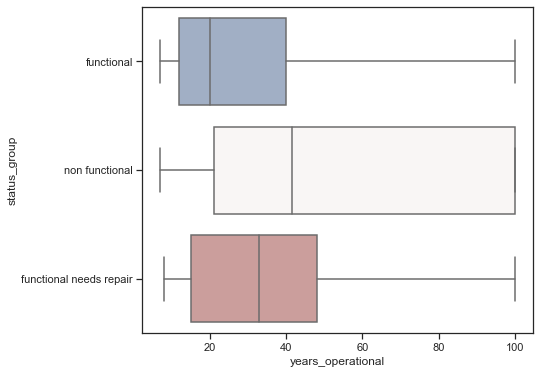

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("linear")

# Load the example planets dataset


# Plot the orbital period with horizontal boxes
sns.boxplot(x="years_operational", y="status_group", data=dummies,
            whis="range", palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="distance", y="method", data=planets,
              size=2, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [ ]:
dummies.groupby(['status_group','years_operational'])['years_operational'].describe()